# __BANKRUPTCY PREVENTION__

## Binary Classification Task

# TOPICS: <a id="home"></a>
- [Exploratary Data Analysis](#eda)<br>
- [Model Building](#Model)<br>

# EDA <a id="eda"></a>

# CONTENTS 
[1.Importing Libraries and Reading File](#1)<br>
[2.Checking for Missing values](#2)<br>
[3.Checking for Correlation](#3)<br>
[4.pandas.Crosstab](#6)<br>
[5.Distribution Plot](#4)<br>
[6.Violin and Strip Plot](#12)<br>
[7.Line Plot](#5)<br>
[8.Histogram plots](#7)<br>
[9.Density Estimate Plots](#8)<br>
[10.Grouped Bar Charts using sns.catplot](#9)<br>
[11.Stacked Bar Charts](#10)<br>
[12.Conclution](#11)


### Importing Libraries and Reading the file  <a id="1"></a>

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from matplotlib.pyplot import figure
from scipy.stats import spearmanr,kendalltau

In [75]:
data=pd.read_csv("A:\\Data Science by Excelr\\PROJECT\\bankruptcy_prevention.csv",sep=";")

In [76]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [77]:
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
5,1.0,1.0,0.0,0.5,0.0,0.5,bankruptcy
6,1.0,1.0,0.0,0.0,0.0,0.0,bankruptcy
7,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
8,1.0,1.0,0.0,0.5,0.0,0.0,bankruptcy
9,1.0,1.0,0.0,0.5,0.0,1.0,bankruptcy


### Checking For Null Values:  <a id="2"></a>

In [78]:
data.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [80]:
data.shape

(250, 7)

In [81]:
data.describe(include="all")

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,non-bankruptcy
freq,NaN,NaN,NaN,NaN,NaN,NaN,143
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000,NaN
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,NaN
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,NaN


In [82]:
data1=data

### Renaming column to avoid errors

In [83]:
data1=data1.rename(columns = {data.columns[6]: 'class_value'})
data1=data1.rename(columns = {data.columns[5]: 'operating_risk'})
data1=data1.rename(columns = {data.columns[4]: 'competitiveness'})
data1=data1.rename(columns = {data.columns[3]: 'credibility'})
data1=data1.rename(columns = {data.columns[2]: 'financial_flexibility'})
data1=data1.rename(columns = {data.columns[1]: 'management_risk'})

In [84]:
data1.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_value
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [85]:
label_encoder = preprocessing.LabelEncoder()
data1["class_value"] = label_encoder.fit_transform(data1["class_value"])

### Checking for Correlation: <a id="3"></a>

In [86]:
corr=data1.corr()
corr

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_value
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class_value,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


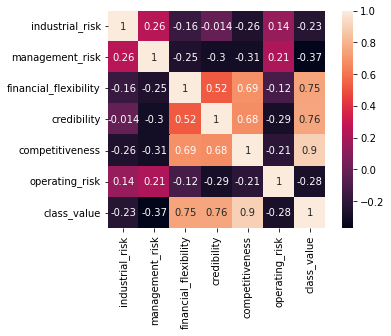

In [87]:
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

### The Correlation values between most variables are not high and so its confusing to find the importance of variables in predicting classes.
***

In [88]:
features=data1.columns[0:6]
features

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk'],
      dtype='object')

## Calculating Non Parametric Rank Correlation to understand correlation b/w data on Discrete values of features.

## Spearmans Correlation

In [89]:
for feature in features:
    coef, p = spearmanr(data1[feature], data1.class_value)
    print("Correlation of %s"%feature, coef)

Correlation of industrial_risk -0.22947170756968077
Correlation of management_risk -0.37439127379904413
Correlation of financial_flexibility 0.7829528097863406
Correlation of credibility 0.7618550599211005
Correlation of competitiveness 0.9059986995626482
Correlation of operating_risk -0.278442572969297


## Kendall's Correlation

In [90]:
for feature in features:
    coef, p = kendalltau(data1[feature], data1.class_value)
    print("Correlation of %s"%feature, coef)

Correlation of industrial_risk -0.2163785912452097
Correlation of management_risk -0.35468549438782987
Correlation of financial_flexibility 0.7422101139825333
Correlation of credibility 0.7186345687862299
Correlation of competitiveness 0.8577141969809939
Correlation of operating_risk -0.2637672137089971


### Kendall’s Rank Correlation is highly precise for Discrete Data than Spearman's Correlation.(Rank Based- Low, Medium, High)[click for reference link](https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/)
***

## Using Crosstab: <a id="6"></a>
### We now use Crosstab from pandas to understand each feature with respect to Bankruptcy.

In [91]:
data1.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class_value'],
      dtype='object')

In [92]:
pd.crosstab(data1.industrial_risk, data1.class_value)

class_value,0,1
industrial_risk,,
0.0,26,54
0.5,28,53
1.0,53,36


In [93]:
pd.crosstab(data1.industrial_risk, data1.class_value, normalize='index')

class_value,0,1
industrial_risk,,
0.0,0.325000,0.675000
0.5,0.345679,0.654321
1.0,0.595506,0.404494


In [94]:
pd.crosstab(data1.management_risk, data1.class_value, normalize='index')

class_value,0,1
management_risk,,
0.0,0.177419,0.822581
0.5,0.333333,0.666667
1.0,0.613445,0.386555


In [95]:
pd.crosstab(data1.financial_flexibility, data1.class_value)

class_value,0,1
financial_flexibility,,
0.0,102,17
0.5,4,70
1.0,1,56


In [96]:
pd.crosstab(data1.financial_flexibility, data1.class_value, normalize='index')

class_value,0,1
financial_flexibility,,
0.0,0.857143,0.142857
0.5,0.054054,0.945946
1.0,0.017544,0.982456


In [97]:
pd.crosstab(data1.credibility, data1.class_value, normalize='index')

class_value,0,1
credibility,,
0.0,0.925532,0.074468
0.5,0.220779,0.779221
1.0,0.037975,0.962025


In [98]:
pd.crosstab(data1.competitiveness, data1.class_value, normalize='index')

class_value,0,1
competitiveness,,
0.0,1.000000,0.000000
0.5,0.071429,0.928571
1.0,0.000000,1.000000


In [99]:
pd.crosstab(data1.operating_risk, data1.class_value, normalize='index')

class_value,0,1
operating_risk,,
0.0,0.240506,0.759494
0.5,0.421053,0.578947
1.0,0.561404,0.438596


In [100]:
pd.crosstab(data1.financial_flexibility, data1.competitiveness, normalize='index')

competitiveness,0.0,0.5,1.0
financial_flexibility,,,
0.0,0.823529,0.067227,0.109244
0.5,0.054054,0.432432,0.513514
1.0,0.017544,0.280702,0.701754


### From the pandas.crosstab, we can see the relation between each features with the classes. <br>And it is understood that all features contibute in determining the Bankruptcy. <br>Also we notice that Financial flexibility, Credibility and Competitiveness does the most contribution to the Bankruptcy.
***

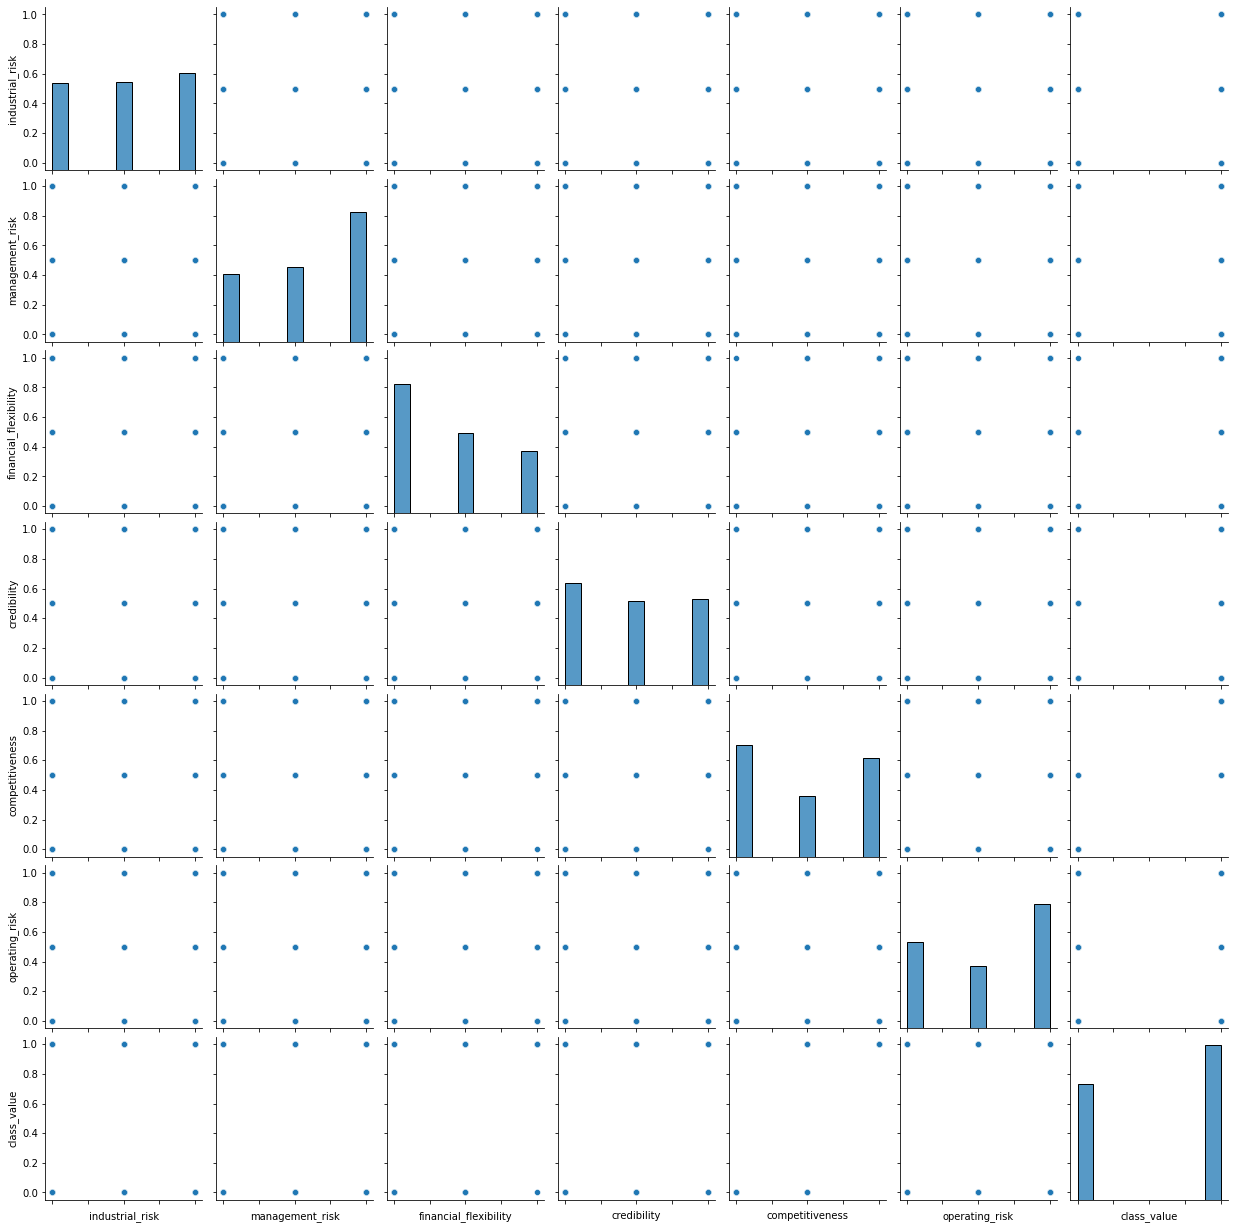

In [101]:
p=sns.pairplot(data1)
p.set(xticklabels=[])
plt.show()

### Pairplot for this data has proven to be not useful because the data is not continuous. Lets explore a bit more on sns.
***

## Distribution Plot <a id="4"></a>

C:\Users\new\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


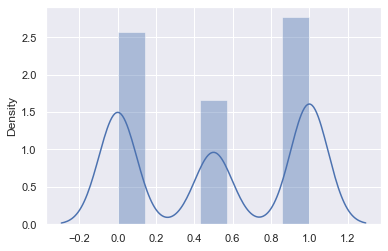

In [102]:
sns.set_theme();
ax = sns.distplot(data1)

### Distribution of the dataset is understood through this plot.
***

## Basic Understanding with Line Plot <a id="5"></a>

<AxesSubplot:>

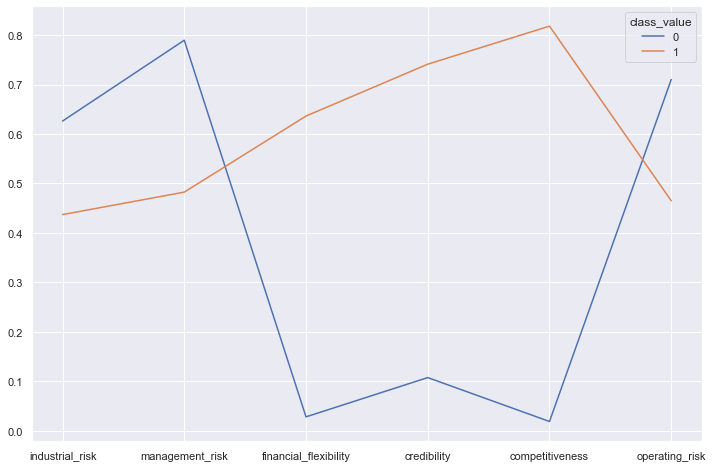

In [103]:
data1.groupby('class_value')[features].mean().T.plot(figsize=(12,8))

### The above line graph analyzes the mean of feature values based on the 2 classes of bankruptcy. <br>You can see which features affect bankruptcy in what way.<br>eg. From the given dataset, competitiveness gives bankrupt when its value is low and does not bankrupt when its values is high.
***

## Violin and Strip Plot <a id="12"></a>

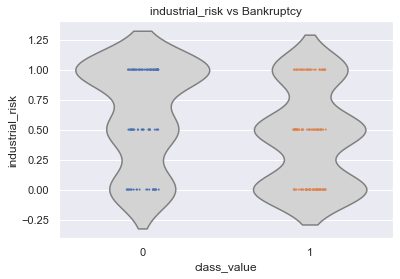

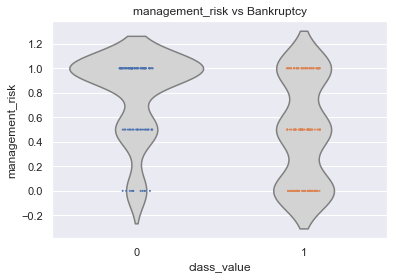

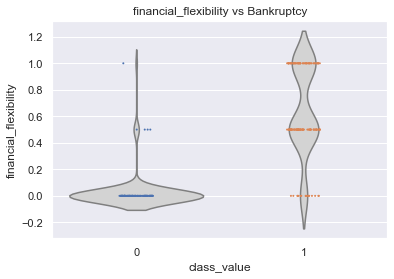

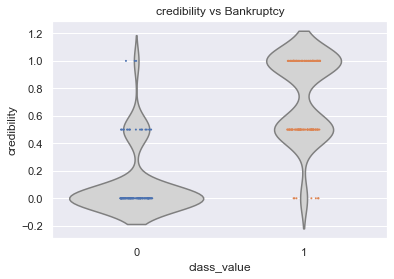

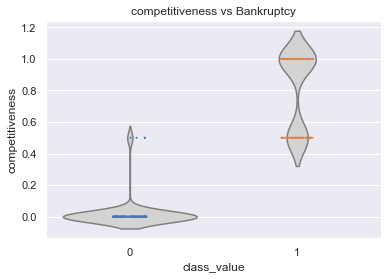

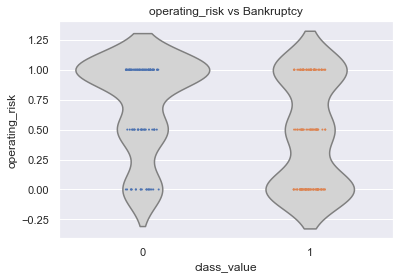

In [104]:
for feature in features:
    sns.violinplot(x='class_value', y=feature, data=data1, inner=None,color='lightgray')
    sns.stripplot(x='class_value', y=feature, data=data1, size=2,jitter=True)
    plt.ylabel(feature)
    plt.title("%s vs Bankruptcy"%feature)
    plt.show()

### From above all violineplot & stripplot we can understand three feature(Financial Flexibility , Credibility and Competitiveness) are highly correlated with dependent variable.
***

## Histogram plots <a id="7"></a>

In [105]:
data1.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_value
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


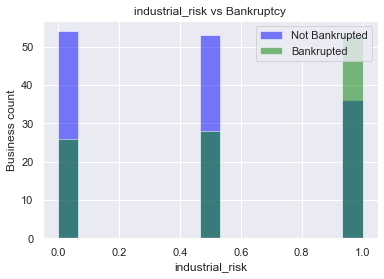

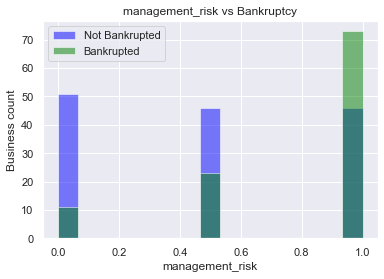

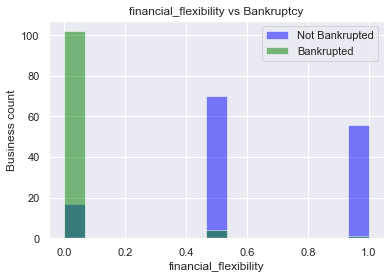

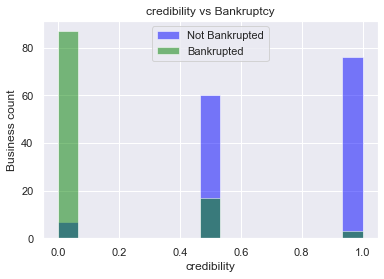

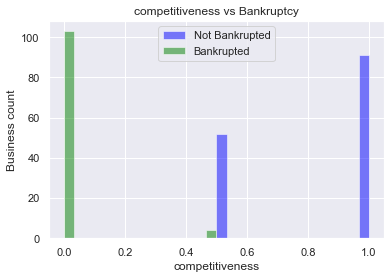

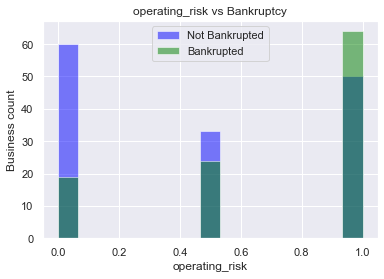

In [106]:
for feature in features:
    fig, ax = plt.subplots()

    ax.hist(data1[data1["class_value"]==1][feature], bins=15, alpha=0.5, color="blue", label="Not Bankrupted")
    ax.hist(data1[data1["class_value"]==0][feature], bins=15, alpha=0.5, color="green", label="Bankrupted")

    ax.set_xlabel(feature)
    ax.set_ylabel("Business count")
    ax.set_title("%s vs Bankruptcy"%feature)

    ax.legend();

### The above bar graphs tells us the relation between each feature and the count of business with bankruptcy
***

## Density Estimate Plots <a id="8"></a>

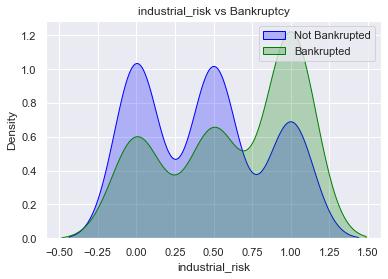

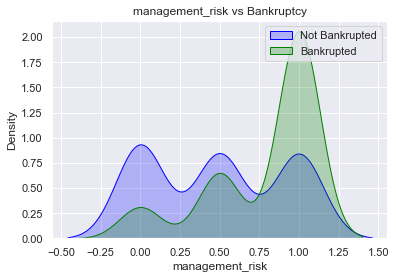

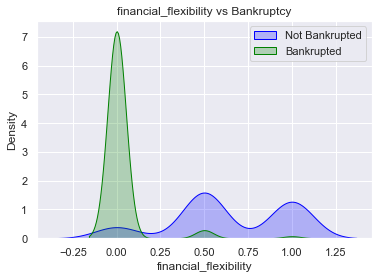

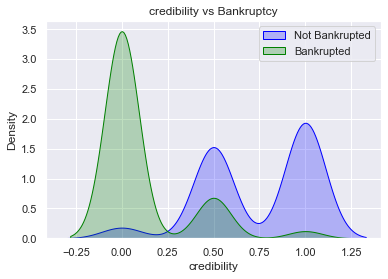

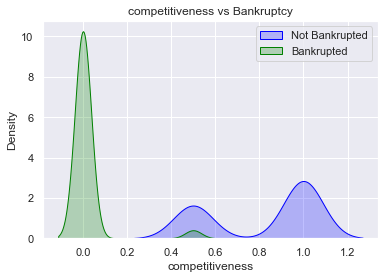

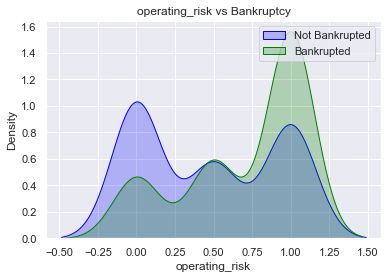

In [107]:
for feature in features:
    fig, ax = plt.subplots()

    sns.kdeplot(data1[data1["class_value"]==1][feature], shade=True, color="blue", label="Not Bankrupted", ax=ax)
    sns.kdeplot(data1[data1["class_value"]==0][feature], shade=True, color="green", label="Bankrupted", ax=ax)

    ax.set_xlabel(feature)
    ax.set_ylabel("Density")
    ax.set_title("%s vs Bankruptcy"%feature)
    #fig.suptitle("Financial Flexibility vs. Bankruptcy");
    ax.legend();

### The above graphs show the density of Bankruptcy happening w.r.t different features. We can understand the spread of data with this graph i.e. Normal distribution.<br>Also we can know from the peaks of a Density Plot where values are concentrated over the interval. <br>We can also understand the distribution shape from the above plots.
***

## Grouped Bar Charts using sns.catplot - Type 1 <a id="9"></a>

C:\Users\new\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\new\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\new\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


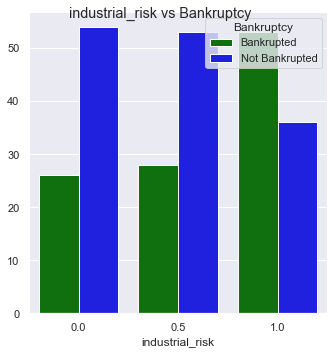

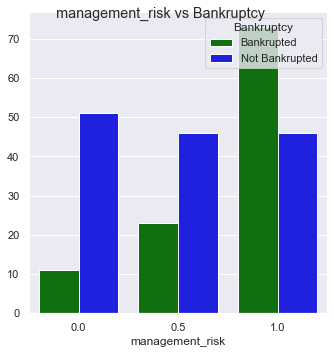

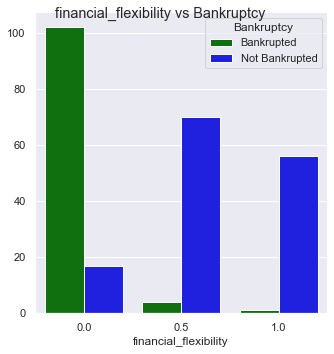

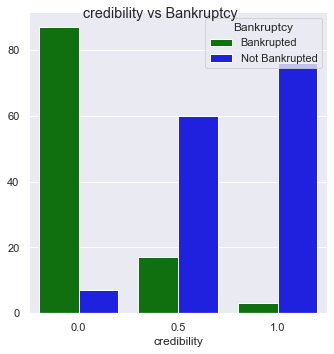

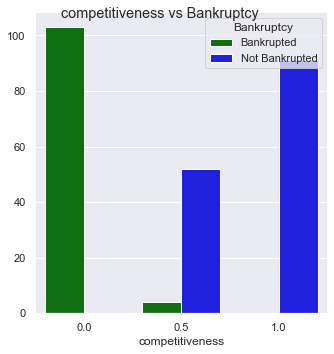

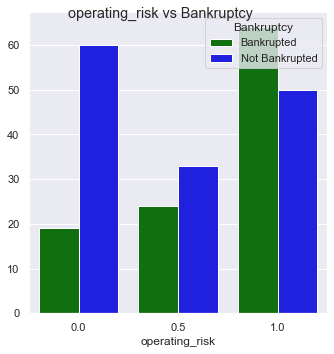

In [108]:
for feature in features:
    g=sns.catplot(feature, hue="class_value", data=data1, kind="count",legend = False,
            palette={1:"blue", 0:"green"})

    g.set_axis_labels(feature,"")
    plt.legend(title='Bankruptcy', loc='upper right', labels=['Bankrupted', 'Not Bankrupted'])
    #g.set_title("%s vs Bankruptcy"%feature)
    g.fig.suptitle("%s vs Bankruptcy"%feature);

### The above graph is grouped based on bankruptcy along the features. <br>Here we can look at both classes w.r.t features side by side and understand data better.
***

## Grouped Bar Charts using sns.catplot - Type 2

C:\Users\new\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\new\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\new\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


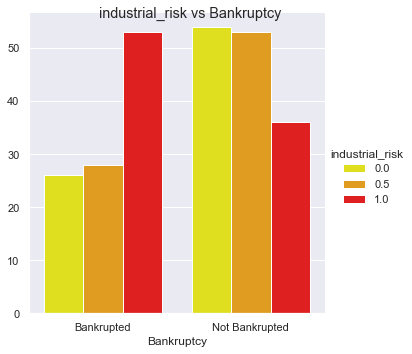

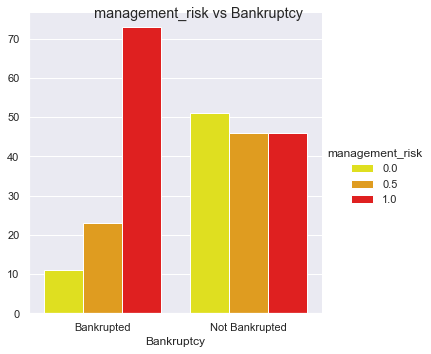

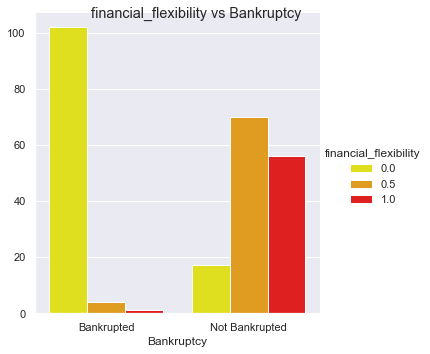

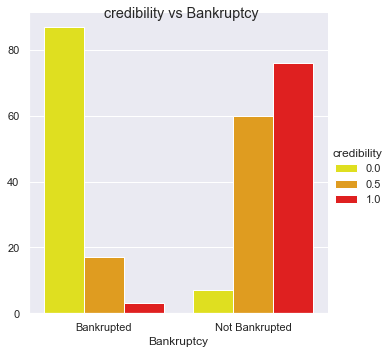

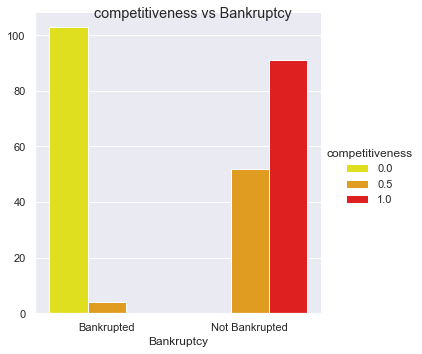

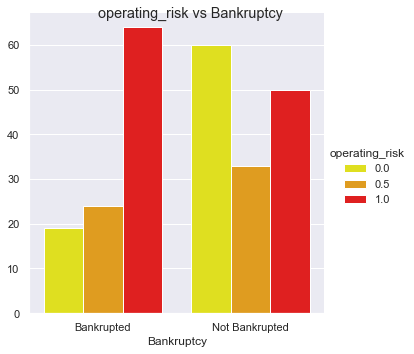

In [109]:
for feature in features:
    g=sns.catplot("class_value", hue=feature, data=data1, kind="count", 
            palette={0:"yellow", 0.5:"orange", 1:"red"})

    g.legend.set_title(feature)
    g.set_xticklabels(["Bankrupted", "Not Bankrupted"])
    g.set_axis_labels("Bankruptcy","")

    g.fig.suptitle("%s vs Bankruptcy"%feature);

### The above graph is grouped based on features along with Bankruptcy.<br>Here we can look at different feature values w.r.t Bankruptcy side by side and understand data better
***

## Stacked Bar Charts for checking proportion <a id="10"></a>

# for feature in features:
    counts_df = data1.groupby([feature, "class_value"])["competitiveness"].count().unstack()
    Bankruptcy_df = counts_df.T.div(counts_df.T.sum()).T
    g=Bankruptcy_df.plot(kind="bar", stacked=True, color=["green", "blue"]).set(title="%s vs Bankruptcy"%feature)

    plt.gcf().set_size_inches(6,6)
    plt.legend(title='Bankruptcy', loc='upper right', labels=['Bankrupted', 'Not Bankrupted'])
    plt.xlabel(feature)
    plt.ylabel("Proportion")

### The above graph shows the comparisions between the bankruptcy classes.<br>We can see the proportion of classes w.r.t the discrete values of the features.
***

# CONCLUSION FROM EDA PROCESS: <a id="11"></a>

### From the basic pd.crosstab executions, we find that Financial Flexibility, Competitiveness and Credibility does the most contribution for the bankruptcy.

### From the Histograms, we can assume that Industrial Risk, Management Risk and Operating Risk have varied businessess(count) with varied Bankruptcy classes. These 3 feature surely impact a little for determining Bankruptcy.

### The Density Estimate plots give the distribuiton shape which is Normally Distributed.

### The grouped Bar charts(1&2) gives us the relation between features and Bankruptcy. We can declare Financial Flexibility, Competitiveness and Credibility are showing higher contribution to Bankruptcy.<br>We can also assume that Industrial Risk, Management Risk and Operating Risk have some impact in determining Bankruptcy. Its still Unclear.

### Stacked Bar charts tells us that in what proportion the data is distributed based on Bankruptcy. 
***

[Go Home](#home)<br>

# Model Building <a id="Model"></a>

# CONTENTS <a id="contents"></a>
[1.Feature Engineering](#feature)<br>
[2.Artificial Neural Networks](#ann)<br>
[3.ANN Libraries](#libraries)<br>
[4.Hyperparameter Tuning](#keras)<br>
[5.Final Model](#final)<br>
[6.Evaluation](#eval)<br>

#### Splitting Data as features and target

In [44]:
X=data1.iloc[:,0:6]
Y=data1["class_value"]

#### Splitting Data for train and test

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=123,test_size=0.30)

In [46]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(175, 6)
(75, 6)
(175,)
(75,)


### Feature Engineering <a id="feature"></a>

In [47]:
selector = SelectFromModel(estimator = RandomForestClassifier(n_estimators=20,random_state=0,n_jobs=-1))
selector.fit(X_train,Y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=20, n_jobs=-1,
                                                 random_state=0))

In [81]:
selector.get_support()

array([False, False,  True, False,  True, False])

In [20]:
features = X_train.columns[selector.get_support()]
features

Index(['financial_flexibility', 'competitiveness'], dtype='object')

#### We can conclude that financial flexibililty,credibility and competitiveness are the most important features to predict bankruptcy.
***

## Artificial Neural Networks <a id="ann"></a>
- Artificial neural networks (ANNs) are comprised of node layers- containing an input layer, one or more hidden layers, and an output layer.<br>
- Each Node is connected to another node from the next hidden layers and has associated weights and threshold. Each node is activated if the threshold is met. Otherwise Data is not passed.<br>
- Neural networks rely on training data to learn and improve their accuracy over time.  <br>
- With proper fine tuning, these models can give high accuracy on many problems to classify or cluster data at high velocity.

<img src="https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork-WHITEBG.png" alt="Deep Neural Network Structure" style="width: 600px;"/>

***

### Neural Network libraries <a id="libraries"></a>

In [48]:
from tensorflow import keras
from keras.models import Sequential
from keras.activations import relu, sigmoid
from tensorflow.keras import layers
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from keras_tuner.tuners import RandomSearch
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score as ac
from sklearn.model_selection import cross_val_score
from matplotlib import rcParams
import numpy as np

In [49]:
#Standardizing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Hyperparameters in ANN - Used to Fine tune a model for high accuracy<br> Keras Tuner is used. <a id="keras"></a>
   
   1. How many number of hidden layers we should have? - We used 2 to 20 layers.
   2. How many number of neurons we should have in hidden layers? - We used 32 to 512 neurons.
   3. Learning Rate - We used 1e-2, 1e-3, 1e-4.
      
      Other Parameters used
   4. Loss function - Binary Cross Entropy
   5. Metric - Accuracy
   6. Activation function - Sigmoid for the Output layer and Relu for all other layers
   7. Optimizer - Adam
#### Important note: 
- We have already run the tuner to choose the best model, Dont need to run the Keras Tuner code again.<br> Go to Final code.

In [50]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=6,))
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [51]:
tuner = RandomSearch(
    build_model,
    objective='accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project1',
    project_name='Bankruptcy-Prevention')

INFO:tensorflow:Reloading Oracle from existing project project1\Bankruptcy-Prevention\oracle.json
INFO:tensorflow:Reloading Tuner from project1\Bankruptcy-Prevention\tuner0.json


##### We are tuning the model based on accuracy. 

In [ ]:
tuner.search_space_summary()


#### fitting the data by comparing with the validation set made.

In [ ]:
tuner.search(X_train_scaled, Y_train,
             epochs=10,
             validation_split=0.3)

In [ ]:
tuner.results_summary()

##### Here By Keras tuner Optimization, We have few best combinations of Hyperparameters leading to high Accuracy(100 percent in this case). Now we choose the best combination to make a final Neural Network for Model building.¶


### Making the Final Model with the chosen hyperparameters <a id="final"></a>

In [52]:
classifier=Sequential()

In [53]:
classifier.add(Dropout(0.2,input_dim=6))
classifier.add(layers.Dense(units=224,kernel_initializer ='he_uniform',activation='relu',input_dim=6))
classifier.add(layers.Dense(units=224,kernel_initializer ='he_uniform',activation='relu'))
classifier.add(layers.Dense(units=384,kernel_initializer ='he_uniform',activation='relu'))
classifier.add(layers.Dense(units=1,kernel_initializer ='glorot_uniform',activation='sigmoid'))

##### Dropout is only used during the training of a model and is not used when evaluating the skill of the model.

In [54]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 224)               1568      
                                                                 
 dense_4 (Dense)             (None, 224)               50400     
                                                                 
 dense_5 (Dense)             (None, 384)               86400     
                                                                 
 dense_6 (Dense)             (None, 1)                 385       
                                                                 
Total params: 138,753
Trainable params: 138,753
Non-trainable params: 0
_________________________________________________________________


In [55]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
model_final=classifier.fit(X_train_scaled, Y_train,
             epochs=100,batch_size=1,
             validation_split=0.3)

Epoch 1/100
122/122 [==============================] - 3s 7ms/step - loss: 0.4823 - accuracy: 0.7541 - val_loss: 0.1122 - val_accuracy: 1.0000
Epoch 2/100
122/122 [==============================] - 0s 4ms/step - loss: 0.1132 - accuracy: 0.9836 - val_loss: 0.0654 - val_accuracy: 1.0000
Epoch 3/100
122/122 [==============================] - 0s 3ms/step - loss: 0.1163 - accuracy: 0.9590 - val_loss: 0.0439 - val_accuracy: 1.0000
Epoch 4/100
122/122 [==============================] - 1s 4ms/step - loss: 0.0733 - accuracy: 0.9836 - val_loss: 0.0346 - val_accuracy: 1.0000
Epoch 5/100
122/122 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9918 - val_loss: 0.0283 - val_accuracy: 1.0000
Epoch 6/100
122/122 [==============================] - 0s 4ms/step - loss: 0.0312 - accuracy: 0.9918 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 7/100
122/122 [==============================] - 0s 3ms/step - loss: 0.1085 - accuracy: 0.9672 - val_loss: 0.0156 - val_accuracy: 1.0000

Epoch 58/100
122/122 [==============================] - 1s 5ms/step - loss: 0.0220 - accuracy: 0.9918 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 59/100
122/122 [==============================] - 1s 5ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 60/100
122/122 [==============================] - 1s 5ms/step - loss: 0.0520 - accuracy: 0.9754 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 61/100
122/122 [==============================] - 0s 4ms/step - loss: 0.0625 - accuracy: 0.9672 - val_loss: 8.4219e-04 - val_accuracy: 1.0000
Epoch 62/100
122/122 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 0.9918 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 63/100
122/122 [==============================] - 1s 4ms/step - loss: 0.0472 - accuracy: 0.9836 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 64/100
122/122 [==============================] - 1s 4ms/step - loss: 0.0149 - accuracy: 0.9918 - val_loss: 0.0015 - val_accur

In [91]:
import h5py

In [57]:
from tensorflow.keras.models import load_model

classifier.save(r'C:\Users\new\Documents\PythonFiles\bankr.h5')
print("Saved model to disk")



Saved model to disk


In [58]:
# load model
model = load_model(r'C:\Users\new\Documents\PythonFiles\bankr.h5')

In [31]:
X_test

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
127,0.5,0.5,1.0,0.5,0.5,0.5
187,0.0,0.5,0.5,0.5,1.0,0.5
24,1.0,1.0,0.0,0.0,0.0,0.5
206,0.0,0.5,1.0,0.5,1.0,0.0
235,0.5,0.5,1.0,0.5,0.5,0.5
31,1.0,1.0,0.0,0.0,0.0,1.0
20,0.0,1.0,0.0,0.0,0.0,0.0
202,0.0,0.0,1.0,0.5,1.0,1.0
196,0.5,0.5,0.5,1.0,1.0,0.5
201,0.0,0.5,1.0,0.0,1.0,1.0


In [32]:
array=np.array([[0,0.5,1,1,0,0.5]])
#column_values = ['industrial_risk', 'management_risk', 'financial_flexibility','credibility','competitiveness','operating_risk']
df = pd.DataFrame(data = array)
                 # columns = column_values)

In [49]:
array

array([[0. , 0.5, 1. , 1. , 0. , 0.5]])

In [45]:
pred_y = model.predict(array)

In [46]:
pred_y

array([[0.9998772]], dtype=float32)

##### - For 100 epochs, We can notice that there is high training accuracy(99.18%) and validation accuracy of 100%
- From this we can tell that our model is performing very well.(Not Overfitted)
- Here we can notice that the validation split is a split from the X_train data. So, For predicting we use the test data(Unseen data) which is not affected by any data leakage thus preventing overfitting.¶ 

### Prediction and Confusion Matrix and AUC ROC Curve <a id="eval"></a>

In [35]:
pred_y=classifier.predict(X_test)

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
# Computing manually fpr, tpr, thresholds and roc auc 
fpr, tpr, thresholds = roc_curve(Y_test, pred_y)
roc_auc = auc(fpr, tpr)
print("ROC_AUC Score : ",roc_auc)
print("Function for ROC_AUC Score : ",roc_auc_score(Y_test, pred_y))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

##### This is a very good ROC Curve meaning that we can perfectly distinguish between Bankrupted and Not Bankrupted.

In [47]:
y_pred = (pred_y >= 0.9908809) #optimal threshold is 0.9908809
y_pred=1*y_pred 

In [48]:
y_pred

array([[1]])

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
score=ac(y_pred,Y_test)

In [ ]:
print("Confusion Matrix: \n",cm,"\n Test Accuracy Score: ", score,"\n\n")
print(classification_report(Y_test,y_pred))

#### From the confusion matrix and report, We can see that 1 of the data is misclassified. But Still we can say that our model is performing very good on Unseen data.<br>_Train Accuracy_ : 99.18%<br>_Test Accuracy_ : 98.66%

### Graphical representation of Accuracy and loss w.r.t no. of Epochs.

In [ ]:
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(
    np.arange(1, 101), 
    model_final.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    model_final.history['accuracy'], label='Accuracy'
)

plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

##### From Graph, we can see the increase in accuracy and decrease in loss w.r.t epochs. 

### Insights

>### Artificial Neural Network

    Since all the graphs and results shows high accuracy, thus we can conclude that our ANN model is performing perfectly with very high accuracy and not Overfitted.

[Get back to Contents](#Model)<br> [Go Home](#home)<br>

## Deployment of the Project

In [ ]:
from tensorflow.keras.models import load_model

classifier.save(r'C:\Users\new\Documents\PythonFiles\bankr.h5')
print("Saved model to disk")


In [ ]:
import numpy as np
import pickle
import pandas as pd
import streamlit as st 

from PIL import Image

In [ ]:
# load model
model = load_model(r'C:\Users\new\Documents\PythonFiles\bankr.h5')

In [ ]:
#pickle_in = open(r'C:\Users\new\Documents\PythonFiles\bankr.h5',"rb")
#classifier=pickle.load(pickle_in)


In [ ]:
def welcome():
    return "Welcome All"

In [ ]:
def predict_bankruptcy(Industrial_risk,Management_risk,Financial_Flexibility,Credibility,Competitiveness,Operating_risk):
    
    """Let's Authenticate the Banks Note 
    This is using docstrings for specifications.
    ---
    parameters:  
      - name: variance
        in: query
        type: number
        required: true
      - name: skewness
        in: query
        type: number
        required: true
      - name: curtosis
        in: query
        type: number
        required: true
      - name: entropy
        in: query
        type: number
        required: true
    responses:
        200:
            description: The output values
        
    """
   
    prediction=classifier.predict([[Industrial_risk,Management_risk,Financial_Flexibility,Credibility,Competitiveness,Operating_risk]])
    print(prediction)
    return prediction

In [ ]:
def main():
    st.title("Bankruptcy Prevention")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Streamlit Bankruptcy Predictor App </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    Industrial_risk = st.text_input("Industrial_risk","Type Here")
    Management_risk = st.text_input("Management_risk","Type Here")
    Financial_Flexibility = st.text_input("Financial_Flexibility","Type Here")
    Credibility = st.text_input("Credibility","Type Here")
    Competitiveness = st.text_input("Competitiveness","Type Here")
    Operating_risk = st.text_input("Operating_risk","Type Here")
    
    result=""
    if st.button("Predict"):
        result=predict_banruptcy(variance,skewness,curtosis,entropy)
    st.success('The output is {}'.format(result))
    if st.button("About"):
        st.text("Lets LEarn")
        st.text("Built with Streamlit")


In [ ]:
if __name__=='__main__':
    main()

In [ ]:
    """Let's Authenticate the Bankruptcy 
    This is using docstrings for specifications.
    ---
    parameters:  
      - name: industrial_risk
        in: query
        type: number
        required: true
      - name: management_risk
        in: query
        type: number
        required: true
      - name: financial_flexibility
        in: query
        type: number
        required: true
      - name: credibility
        in: query
        type: number
        required: true
      - name: competitiveness
        in: query
        type: number
        required: true
      - name: operating_risk
        in: query
        type: number
        required: true
    responses:
        200:
            description: The output values
        
    """

In [59]:
a='low'

In [60]:
type(a)

str

In [61]:
if a=="low":
    a=4.5

In [62]:
a

4.5

In [63]:
type(a)

float

In [64]:
features

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk'],
      dtype='object')

In [103]:
a=1
b=2
c=3

In [65]:
industrial_risk="low"
management_risk="medium"
financial_flexibility="high"
credibility="medium"
competitiveness="high"
operating_risk="medium"

In [66]:
if industrial_risk=="low":
    industrial_risk=0
elif industrial_risk=="medium":
    industrial_risk=0.5
elif industrial_risk=="high":
    industrial_risk=1
if management_risk=="low":
    management_risk=0
elif management_risk=="medium":
    management_risk=0.5
elif management_risk=="high":
    management_risk=1
if financial_flexibility=="low":
    financial_flexibility=0
elif financial_flexibility=="medium":
    financial_flexibility=0.5
elif financial_flexibility=="high":
    financial_flexibility=1
if credibility=="low":
    credibility=0
elif credibility=="medium":
    credibility=0.5
elif credibility=="high":
    credibility=1
if competitiveness=="low":
    competitiveness=0
elif competitiveness=="medium":
    competitiveness=0.5
elif competitiveness=="high":
    competitiveness=1
if operating_risk=="low":
    operating_risk=0
elif operating_risk=="medium":
    operating_risk=0.5
elif operating_risk=="high":
    operating_risk=1
    

In [71]:
industrial_risk=str(input("Enter your value: "))
management_risk=str(input("Enter your value: "))
financial_flexibility=str(input("Enter your value: "))
credibility=str(input("Enter your value: "))
competitiveness=str(input("Enter your value: "))
operating_risk=str(input("Enter your value: "))

result=predict_bankruptcy(industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk)

Enter your value: low
Enter your value: medium
Enter your value: low
Enter your value: low
Enter your value: low
Enter your value: low
[[0.5183404]]


In [72]:
def predict_bankruptcy(industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk):
    if industrial_risk=="low":
        industrial_risk=0
    elif industrial_risk=="medium":
        industrial_risk=0.5
    elif industrial_risk=="high":
        industrial_risk=1
    if management_risk=="low":
        management_risk=0
    elif management_risk=="medium":
        management_risk=0.5
    elif management_risk=="high":
        management_risk=1
    if financial_flexibility=="low":
        financial_flexibility=0
    elif financial_flexibility=="medium":
        financial_flexibility=0.5
    elif financial_flexibility=="high":
        financial_flexibility=1
    if credibility=="low":
        credibility=0
    elif credibility=="medium":
        credibility=0.5
    elif credibility=="high":
        credibility=1
    if competitiveness=="low":
        competitiveness=0
    elif competitiveness=="medium":
        competitiveness=0.5
    elif competitiveness=="high":
        competitiveness=1
    if operating_risk=="low":
        operating_risk=0
    elif operating_risk=="medium":
        operating_risk=0.5
    elif operating_risk=="high":
        operating_risk=1
    pred_y=model.predict([[industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk]])
    print(pred_y)

In [115]:
pred_y

array([[0.99999636]], dtype=float32)

In [ ]:
    #column_values = ['industrial_risk', 'management_risk', 'financial_flexibility','credibility','competitiveness','operating_risk']
    #df = pd.DataFrame(data = array)
        #prediction=model.predict([[industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk]])
